# Introducción a Python

Esta es una breve introducción a Python. Es recomendable también afianzar dichos conocimientos a tráves de cursos gratuitos o pagos a tráves de plataformas como Udemy, Datacamp, etc.

### 1. Definición de variables

In [2]:
# Definición de variables
a = 1
b = 2

print(a + b)

3


### 2. Strings

In [3]:
hello = "Hola mundo"
print(hello + ", " + "Esto es genial")

Hola mundo, Esto es genial


### 3. Contenedores

- **Listas**

In [4]:
a = [1, [2, 4], 3]
print(a[1])

[2, 4]


- **Diccionarios**

In [6]:
b = {"Pais": "Colombia", "Edad": 5}
print(b)

{'Pais': 'Colombia', 'Edad': 5}


### 4. Funciones

In [5]:
def sum(a, b) :
    return a + b
print(sum(1,2))

3


### 5. Ciclos

In [7]:
a = [1, [2, 4], 3]
for item in a :
    print(item)

1
[2, 4]
3


# Linear Regression with Python

Las listas _(list)_ lo utilizaremos para almacenar datos densos, mientras que para datos disperos, usaremos los diccionarios (_dict_). Para este tema, utilizaremos los paquetes **NumPy** y **matplotlib**.

Las *filas* serán los **datos** mientras que las *columnas* seran las **caracteristicas**. Además, la matrix *data_x* denotarán los **feature** mientras que la matrix *data_y* denotarán los **label**

In [18]:
# Importamos las librerias necesarias para trabajar
import numpy as np
from matplotlib import pyplot as plt
# Este comando permite que las gráficas queden dentro de la vista de nuestra "notebook".
%matplotlib inline

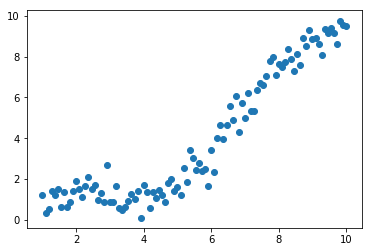

In [23]:
# Creamos nuestras matrices de datos
# el metodo newaxis se encarga de agregar una fila en nuestro vector, para asi tener una matrix
data_x = np.linspace(1, 10, 100)[:, np.newaxis]
data_y = np.sin(data_x) + 0.1 * np.power(data_x, 2) + 0.5 * np.random.randn(100, 1)

plt.scatter(data_x, data_y);

Creamos nuestra matriz de pesos (los cuales son aleatorios) llamado **weight**. y nuestros estimados / predicciones, los cuales llamamos **estimate**, serán el producto punto entre nuestros datos 

In [92]:
weights = np.random.random((1, 1))
# Definimos el tamaño del paso (step)
step_size = 1E-6
print(weights.shape)

(1, 1)


In [93]:
# Calculamos las predicciones (compute predictions).
for epoch in range(1000) :
    estimate = data_x.dot(weights)
    # Función de perdida estimada (estimate loss function)
    loss = np.power((estimate - data_y), 2).mean()

    # Calculamos el gradiente de perdida (Gradient loss)
    grad_loss = 2 * data_x.T.dot(estimate - data_y)
    weights = weights - step_size * grad_loss
    
    if epoch % 100 == 0 :
        print("Epoch: %d - Loss: %.4f" % (epoch, loss))

Epoch: 0 - Loss: 2.9670
Epoch: 100 - Loss: 2.4188
Epoch: 200 - Loss: 2.2954
Epoch: 300 - Loss: 2.2676
Epoch: 400 - Loss: 2.2614
Epoch: 500 - Loss: 2.2599
Epoch: 600 - Loss: 2.2596
Epoch: 700 - Loss: 2.2596
Epoch: 800 - Loss: 2.2595
Epoch: 900 - Loss: 2.2595


### Agregando nueva dimensión 
Teniendo nuestros datos *data_x*, agregamos una nueva columna a dicha matriz, para lo cual realizamos el mismo proceso realizado anteriormente.

In [94]:
phi_x = np.hstack([np.ones_like(data_x), data_x])
phi_x.shape

(100, 2)

In [95]:
weights = np.random.random((2, 1))
# Definimos el tamaño del paso (step)
step_size = 1E-6
print(weights.shape)

(2, 1)


In [96]:
# Calculamos las predicciones (compute predictions).
for epoch in range(1000) :
    estimate = phi_x.dot(weights)
    # Función de perdida estimada (estimate loss function)
    loss = np.power((estimate - data_y), 2).mean()

    # Calculamos el gradiente de perdida (Gradient loss)
    grad_loss = 2 * data_x.T.dot(estimate - data_y)
    weights = weights - step_size * grad_loss
    
    if epoch % 100 == 0 :
        print("Epoch: %d - Loss: %.4f" % (epoch, loss))

Epoch: 0 - Loss: 3.0964
Epoch: 100 - Loss: 2.9492
Epoch: 200 - Loss: 2.9328
Epoch: 300 - Loss: 2.9341
Epoch: 400 - Loss: 2.9362
Epoch: 500 - Loss: 2.9373
Epoch: 600 - Loss: 2.9379
Epoch: 700 - Loss: 2.9381
Epoch: 800 - Loss: 2.9382
Epoch: 900 - Loss: 2.9382


De lo anterior, podemos concluir que al agregar una dimensión, puede que el error sea más pequeño (o más grande) con las mismas epocas.

### Tarea
Ya tenemos nuestro modelo de regresion, pero utilizando "Gradient estocastic sgd", escogiendo la cantidad de datos / divisiones para hacerlo.